In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [10]:
current_dir = os.getcwd()
print(f"Diretório de trabalho atual: {current_dir}")

caminho_relativo = r'..\..\data\dados_balanceados.csv'

if os.path.exists(caminho_relativo):
    dados = pd.read_csv(caminho_relativo)
    print(dados.head())
else:
    print(f"Arquivo não encontrado: {caminho_relativo}")

Diretório de trabalho atual: c:\Users\herbe\Desktop\JaPodeVoar\app\models
   Airline  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0        4          172        134          1   715     153      0
1       13          119        207          3   480      62      1
2       15          152        153          5  1000      70      1
3       15          152        279          3   385      75      0
4        4           96         80          2   405     244      0


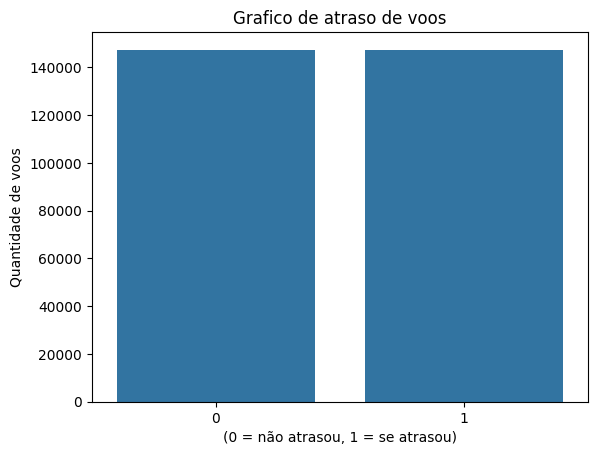

In [11]:
# Visualização se target está balanceado
sns.countplot(x = 'Delay', data = dados)
plt.title('Grafico de atraso de voos')
plt.xlabel('(0 = não atrasou, 1 = se atrasou)')
plt.ylabel('Quantidade de voos')
plt.show()

In [13]:
# Separar target dos atributos
x = dados.iloc[:, 0:5] # Atributos 
y = dados.iloc[:, 6] # Taget



In [14]:
x

,Airline,AirportFrom,AirportTo,DayOfWeek,Time
0,4,172,134,1,715
1,13,119,207,3,480
2,15,152,153,5,1000
3,15,152,279,3,385
4,4,96,80,2,405
...,...,...,...,...,...
294735,5,16,85,3,1305
294736,10,80,13,4,815
294737,15,79,215,4,670
294738,5,16,220,4,1155


In [15]:
y

0         0
1         1
2         1
3         0
4         0
         ..
294735    0
294736    1
294737    0
294738    0
294739    0
Name: Delay, Length: 294740, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

knn = KNeighborsClassifier(n_neighbors = 5)
clf = RandomForestClassifier(n_estimators = 200, max_depth=2, random_state=0)
logreg = LogisticRegression()
mlp = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=(5,10), activation='relu')


In [ ]:
def mymodel(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
  plt.show()

0.4800298568229626
              precision    recall  f1-score   support

           0       0.48      0.49      0.49     36891
           1       0.48      0.47      0.47     36794

    accuracy                           0.48     73685
   macro avg       0.48      0.48      0.48     73685
weighted avg       0.48      0.48      0.48     73685



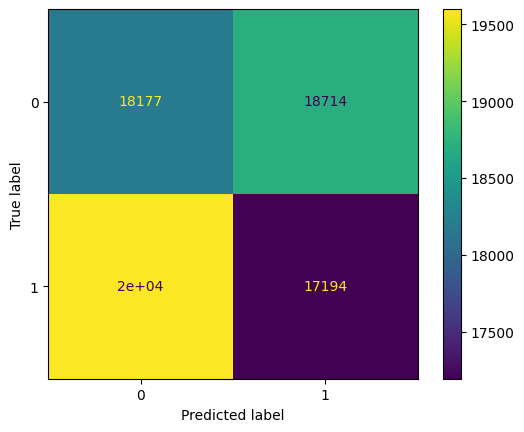

In [ ]:
mymodel(knn)

0.5617832666078578
              precision    recall  f1-score   support

           0       0.56      0.62      0.59     36891
           1       0.57      0.50      0.53     36794

    accuracy                           0.56     73685
   macro avg       0.56      0.56      0.56     73685
weighted avg       0.56      0.56      0.56     73685



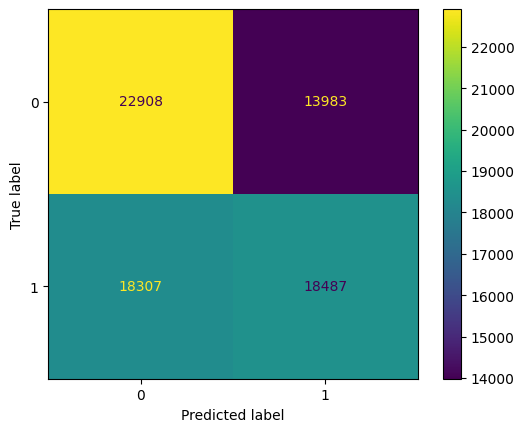

In [ ]:
mymodel(clf)

0.5506683856958675
              precision    recall  f1-score   support

           0       0.55      0.55      0.55     36891
           1       0.55      0.55      0.55     36794

    accuracy                           0.55     73685
   macro avg       0.55      0.55      0.55     73685
weighted avg       0.55      0.55      0.55     73685



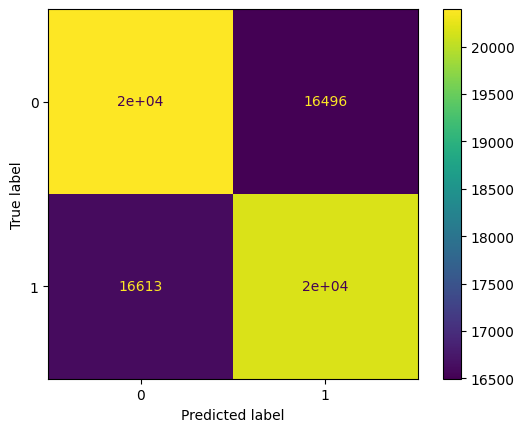

In [ ]:
mymodel(logreg)

0.5412499151794802
              precision    recall  f1-score   support

           0       0.57      0.36      0.44     36891
           1       0.53      0.72      0.61     36794

    accuracy                           0.54     73685
   macro avg       0.55      0.54      0.53     73685
weighted avg       0.55      0.54      0.53     73685



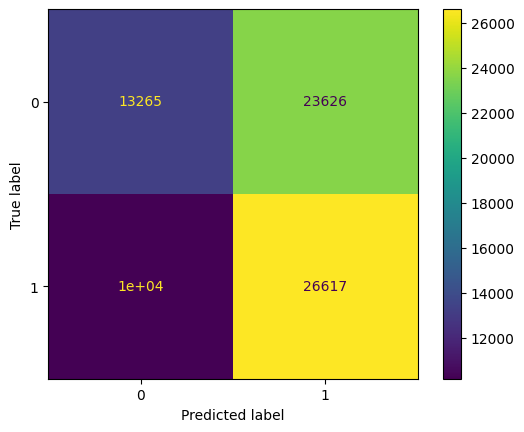

In [ ]:
mymodel(mlp)